### Cuantificación
Antes del procesamiento de las imágenes, se debe generar una cuantificación de estas dependiendo su categoría con el fin de identificar desbalanceos. 

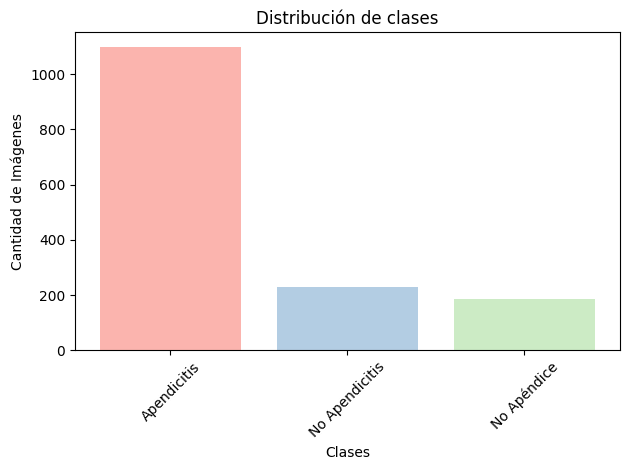


    Apendicitis: 1097, 
    No Apendicitis: 231,
    No Apéndice: 186



In [15]:
# ia_data_4.py

import pandas as pd
import os
import matplotlib.pyplot as plt

# Rutas de archivos
apendicitis = os.listdir(r'us_images\procesar\apendicitis')
no_apendice = os.listdir(r'us_images\procesar\no_apendice')
no_apendicitis = os.listdir(r'us_images\procesar\no_apendicitis')

# Conteo de archivos en cada categoría
count = {
    'Apendicitis': len(apendicitis), 
    'No Apendicitis': len(no_apendicitis),
    'No Apéndice': len(no_apendice)
}

# Crear un DataFrame a partir del diccionario
df = pd.DataFrame(list(count.items()), columns=['Clase', 'Cantidad'])

# Colores pastel
colors = plt.cm.Pastel1.colors

# Crear un gráfico de barras
plt.bar(df['Clase'], df['Cantidad'], color = colors)
plt.xlabel('Clases')
plt.ylabel('Cantidad de Imágenes')
plt.title('Distribución de clases')
plt.xticks(rotation=45)  # Rotar las etiquetas si son demasiado largas
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama
plt.show()

# Información para balancear
print(f'''
    Apendicitis: {len(apendicitis)}, 
    No Apendicitis: {len(no_apendicitis)},
    No Apéndice: {len(no_apendice)}
''')

# Creación Data Generator

In [16]:
# Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil

# Se instancia un objeto de la clase ImageDataGenerator, el cual aplicará 
# transformaciones en las imágenes para aumentar la variedad de datos.
datagen = ImageDataGenerator(
    rescale=1. / 255,  # Normalizar: Reescalar los valores de los píxeles para que estén entre 0 y 1
    rotation_range = 30, # Rango de grados para rotaciones aleatorias de las imágenes.
    width_shift_range=0.12, # Rango (como fracción del total) para traslados horizontales aleatorios.
    height_shift_range=0.12, # Rango (como fracción del total) para traslados verticales aleatorios.
    shear_range=3, # Intensidad de corte para aplicar cortes aleatorios en las imágenes.
    zoom_range=[0.9, 1.5], # Rango para aplicar zoom aleatorio. 
    fill_mode="nearest",
    validation_split=0.2 # Porcentaje de los datos que se reservará para el conjunto de validación.
)

## Cración de imagenes sinteticas

#### PRUEBA #1 guardando las imagenes

In [18]:
import shutil

def augment_and_save_images(datagen, input_dir, output_dir, total_images_expected):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    image_names = os.listdir(input_dir)
    num_images = len(image_names)
    images_to_create = (total_images_expected - num_images)
    print("Images to create: ", images_to_create)
    num_augmented_per_image = images_to_create // num_images  # integer division to get the number of augmented images per original image

    j = 0
    for image_name in image_names:
        j += 1
        if j >= images_to_create:
            break
        img_path = os.path.join(input_dir, image_name)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='aug', save_format='jpeg'):
            i += 1
            if i > num_augmented_per_image:
                break  # this will only break the inner loop

    # Copy original images to the output directory
    for image_name in os.listdir(input_dir):
        shutil.copy(os.path.join(input_dir, image_name), output_dir)


# Rutas de archivos
apendicitis = os.listdir(r'us_images\procesar\apendicitis')
no_apendice = os.listdir(r'us_images\procesar\no_apendice')
no_apendicitis = os.listdir(r'us_images\procesar\no_apendicitis')

# Paths to input and output directories
input_dir_no_appendicitis = r'us_images\procesar\no_apendicitis'
output_dir_no_appendicitis = r'original+synthetic\no_apendicitis'

input_dir_no_appendix = r'us_images\procesar\no_apendice'
output_dir_no_appendix = r'original+synthetic\no_apendice'

input_dir_apendicitis = r'us_images\procesar\apendicitis'
output_dir_apendicitis = r'original+synthetic\apendicitis'

target_image_number = 1500

# Augment and save images
augment_and_save_images(datagen, input_dir_no_appendicitis, output_dir_no_appendicitis, total_images_expected=target_image_number)
augment_and_save_images(datagen, input_dir_no_appendix, output_dir_no_appendix, total_images_expected=target_image_number)
augment_and_save_images(datagen, input_dir_apendicitis, output_dir_apendicitis, total_images_expected=target_image_number)

Images to create:  1269
Images to create:  1314
Images to create:  403


#### PRUEBA 2: Directamente a arrays

In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

import numpy as np
import os

def load_images_from_folder(folder, target_size=(224, 224)):
    images = []
    for filename in os.listdir(folder):
        img = load_img(os.path.join(folder, filename), target_size=target_size)
        if img is not None:
            img_array = img_to_array(img)
            print(f"Image {filename} size after resizing: {img_array.shape}")
            images.append(img_array)
    return np.array(images)

output_dir_no_appendicitis = r'original+synthetic\no_apendicitis'
output_dir_no_appendix = r'original+synthetic\no_apendice'
output_dir_apendicitis = r'original+synthetic\apendicitis'


# Generate augmented images
class1_images = load_images_from_folder(output_dir_no_appendicitis)
class2_images = load_images_from_folder(output_dir_no_appendix)
class3_images = load_images_from_folder(output_dir_apendicitis)

# Combine original and augmented images
# This is just an example. Adjust as necessary based on your actual dataset structure
X = np.concatenate((class1_images, class2_images, class3_images))
y = np.array([0] * len(class1_images) + [1] * len(class2_images) + [2] * len(class3_images))

# Shuffle the dataset
from sklearn.utils import shuffle
X, y = shuffle(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Image 1.1 RLQ_Pathological Lymphnodes.png size after resizing: (224, 224, 3)
Image 1.2 Ileitis.png size after resizing: (224, 224, 3)
Image 1.3 Mesenterial Lymphadenitis.png size after resizing: (224, 224, 3)
Image 1.4 Appendix.png size after resizing: (224, 224, 3)
Image 1.5 Appendix, surrounding tissue reaction.png size after resizing: (224, 224, 3)
Image 13.1 Appendix.png size after resizing: (224, 224, 3)
Image 20.1 Appendix transv.png size after resizing: (224, 224, 3)
Image 20.2 Appendix tangencial.png size after resizing: (224, 224, 3)
Image 210.1 App_M.png size after resizing: (224, 224, 3)
Image 210.2 App_M .png size after resizing: (224, 224, 3)
Image 216.1 App.png size after resizing: (224, 224, 3)
Image 216.2 App_M.png size after resizing: (224, 224, 3)
Image 216.3 App_M.png size after resizing: (224, 224, 3)
Image 216.4 App_M.png size after resizing: (224, 224, 3)
Image 216.5 App_M.png size after resizing: (224, 224, 3)
Image 223.1 App like structure.png size after resizin

Found 3576 images belonging to 3 classes.
Found 894 images belonging to 3 classes.
Classes in training set:  {'apendicitis': 0, 'no_apendice': 1, 'no_apendicitis': 2}
Classes in validation set:  {'apendicitis': 0, 'no_apendice': 1, 'no_apendicitis': 2}
Number of elements in each class in the training set:  {0: 1192, 1: 1192, 2: 1192}
Number of elements in each class in the validation set:  {0: 298, 1: 298, 2: 298}


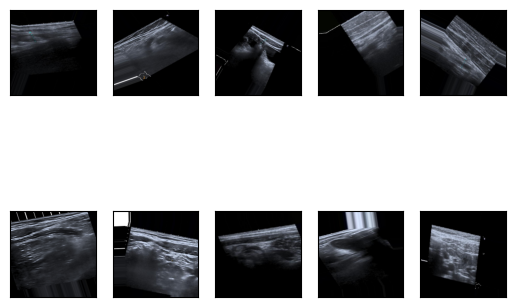

In [20]:
# Ubicación de las imágenes ordenadas
database = r'original+synthetic'
img_size = 224

data_gen_entrenamiento = datagen.flow_from_directory(database, target_size=(img_size,img_size),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory(database, target_size=(img_size,img_size),
                                                     batch_size=32, shuffle=True, subset='validation')

# Print class indices
print("Classes in training set: ", data_gen_entrenamiento.class_indices)
print("Classes in validation set: ", data_gen_pruebas.class_indices)

# Count the number of elements in each class in the training set
unique, counts = np.unique(data_gen_entrenamiento.labels, return_counts=True)
print("Number of elements in each class in the training set: ", dict(zip(unique, counts)))

# Count the number of elements in each class in the validation set
unique, counts = np.unique(data_gen_pruebas.labels, return_counts=True)
print("Number of elements in each class in the validation set: ", dict(zip(unique, counts)))

# Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

# Inicia la Prueba de Modelos!

In [28]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(data_gen, model, valid_steps, ax):
    # Get the true labels
    y_true = data_gen.classes

    # Predict the values from the validation dataset
    Y_pred = model.predict(data_gen, valid_steps)
    
    # Convert predictions classes to one hot vectors 
    y_pred = np.argmax(Y_pred, axis=1)

    # compute the confusion matrix
    confusion_mtx = confusion_matrix(y_true, y_pred) 

    # plot the confusion matrix
    sns.heatmap(confusion_mtx, annot=True, fmt="d", ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

    # Calculate and print % of correct guesses for each class
    class_labels = data_gen.class_indices
    report = classification_report(y_true, y_pred, target_names=class_labels)
    print(report)

def plot_multiple_models(model_histories, data_gen_pruebas, valid_steps):
    num_models = len(model_histories)
    
    # Create a figure with 2 subplots for each model (one for training history, one for confusion matrix)
    fig, axs = plt.subplots(num_models, 2, figsize=(15, num_models*5))
    
    for i, (model_name, history) in enumerate(model_histories.items()):
        # Plot training history
        axs[i, 0].set_title(f'Training History for {model_name}')
        axs[i, 0].plot(history.history['accuracy'])
        axs[i, 0].plot(history.history['val_accuracy'])
        axs[i, 0].set_ylabel('Accuracy')
        axs[i, 0].set_xlabel('Epoch')
        axs[i, 0].legend(['Train', 'Validation'], loc='upper left')
        
        # Plot confusion matrix
        axs[i, 1].set_title(f'Confusion Matrix for {model_name}')
        plot_confusion_matrix(data_gen_pruebas, history.model, valid_steps, axs[i, 1])
        
    plt.tight_layout()
    plt.show()

def plot_multiple_models2(model_histories, X_test, y_test):
    num_models = len(model_histories)
    
    # Create a figure with 2 subplots for each model (one for training history, one for confusion matrix)
    fig, axs = plt.subplots(num_models, 2, figsize=(15, num_models*5))
    
    for i, (model_name, history) in enumerate(model_histories.items()):
        # Plot training history
        axs[i, 0].set_title(f'Training History for {model_name}')
        axs[i, 0].plot(history.history['accuracy'])
        axs[i, 0].plot(history.history['val_accuracy'])
        axs[i, 0].set_ylabel('Accuracy')
        axs[i, 0].set_xlabel('Epoch')
        axs[i, 0].legend(['Train', 'Validation'], loc='upper left')
        
        # Plot confusion matrix
        axs[i, 1].set_title(f'Confusion Matrix for {model_name}')
        y_pred = np.argmax(history.model.predict(X_test), axis=-1)
        y_true = np.argmax(y_test, axis=-1)
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, ax=axs[i, 1])
        
    plt.tight_layout()
    plt.show()

# Se crean los modelos

In [22]:
# Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.optimizers import Adam

# Definir el modelo
def CNN_1(size=150, opt= Adam()):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(size, size, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')  # Ajusta la salida según tu problema
    ])
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])  # Ajusta la configuración según sea necesario
    return model

# Definir el modelo
def CNN_2(size=150, opt= Adam()):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(size, size, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')  # Ajusta la salida según tu problema
    ])
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])  # Ajusta la configuración según sea necesario
    return model

# Definir el modelo
def CNN_3(size=150, opt= Adam()):
    model = Sequential([
        Conv2D(300, (3, 3), activation='relu', input_shape=(size, size, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(12, activation='relu'),
        Dense(3, activation='softmax')  # Ajusta la salida según tu problema
    ])
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])  # Ajusta la configuración según sea necesario
    return model


# Pruebas

In [23]:
from keras.utils import to_categorical

# Convert labels to categorical
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [24]:
from keras.callbacks import EarlyStopping
opt = Adam(learning_rate=0.0001)
simpleCNN = CNN_1(size=224, opt=opt)

# Define the number of training and validation steps
train_steps = data_gen_entrenamiento.samples // data_gen_entrenamiento.batch_size
valid_steps = data_gen_pruebas.samples // data_gen_pruebas.batch_size

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Train the model
history_simpleCNN = simpleCNN.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    callbacks=early_stop,
    epochs=35  # replace with the number of epochs you want
)

valid_steps = data_gen_pruebas.samples // data_gen_pruebas.batch_size

# Plot the training history


C:\Users\escob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 88s 760ms/step - accuracy: 0.3462 - loss: 39.0105 - val_accuracy: 0.3356 - val_loss: 1.1010
Epoch 2/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 75s 666ms/step - accuracy: 0.3219 - loss: 1.1003 - val_accuracy: 0.3322 - val_loss: 1.0976
Epoch 3/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 77s 687ms/step - accuracy: 0.3439 - loss: 1.0934 - val_accuracy: 0.3244 - val_loss: 1.0986
Epoch 4/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 74s 660ms/step - accuracy: 0.3385 - loss: 1.0992 - val_accuracy: 0.3244 - val_loss: 1.0986


In [25]:
opt = Adam(learning_rate=0.0001)
scalingCNN = CNN_2(img_size, opt)

# Define the number of training and validation steps
train_steps = data_gen_entrenamiento.samples // data_gen_entrenamiento.batch_size
valid_steps = data_gen_pruebas.samples // data_gen_pruebas.batch_size

# Train the model
history_scalingCNN = scalingCNN.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    callbacks=early_stop,
    epochs=35  # replace with the number of epochs you want
)

Epoch 1/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 98s 843ms/step - accuracy: 0.3625 - loss: 9.4508 - val_accuracy: 0.3960 - val_loss: 1.0926
Epoch 2/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 98s 869ms/step - accuracy: 0.4083 - loss: 1.0984 - val_accuracy: 0.4743 - val_loss: 1.0767
Epoch 3/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 91s 811ms/step - accuracy: 0.4356 - loss: 1.0763 - val_accuracy: 0.4955 - val_loss: 1.0406
Epoch 4/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 86s 766ms/step - accuracy: 0.4272 - loss: 1.0646 - val_accuracy: 0.4418 - val_loss: 1.0758
Epoch 5/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 87s 778ms/step - accuracy: 0.4333 - loss: 1.0657 - val_accuracy: 0.5213 - val_loss: 1.0365
Epoch 6/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 86s 765ms/step - accuracy: 0.4497 - loss: 1.0460 - val_accuracy: 0.5067 - val_loss: 1.0363
Epoch 7/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 87s 781ms/step - accuracy: 0.4714 - loss: 1.0414 - val_accuracy: 0.5280 - val_loss: 1.0212
Epoch 8/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 88s 787ms/step - accuracy: 0.4693 - loss: 1

In [26]:
opt = Adam(learning_rate=0.0001)
conventionalCNN = CNN_3(img_size, opt)

# Define the number of training and validation steps
train_steps = data_gen_entrenamiento.samples // data_gen_entrenamiento.batch_size
valid_steps = data_gen_pruebas.samples // data_gen_pruebas.batch_size

# Train the model
history_conventionalCNN = conventionalCNN.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    callbacks=early_stop,
    epochs=35  # replace with the number of epochs you want
)

Epoch 1/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 976s 9s/step - accuracy: 0.4114 - loss: 2.2391 - val_accuracy: 0.5615 - val_loss: 0.9762
Epoch 2/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 919s 8s/step - accuracy: 0.5922 - loss: 0.9112 - val_accuracy: 0.5749 - val_loss: 0.9511
Epoch 3/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 838s 7s/step - accuracy: 0.6675 - loss: 0.7921 - val_accuracy: 0.6040 - val_loss: 0.9431
Epoch 4/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 919s 8s/step - accuracy: 0.7278 - loss: 0.6722 - val_accuracy: 0.5906 - val_loss: 1.0036
Epoch 5/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 843s 8s/step - accuracy: 0.7814 - loss: 0.5690 - val_accuracy: 0.6007 - val_loss: 1.0304
Epoch 6/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 848s 8s/step - accuracy: 0.8255 - loss: 0.4438 - val_accuracy: 0.5626 - val_loss: 1.3090


# Información pruebas inciales

28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step


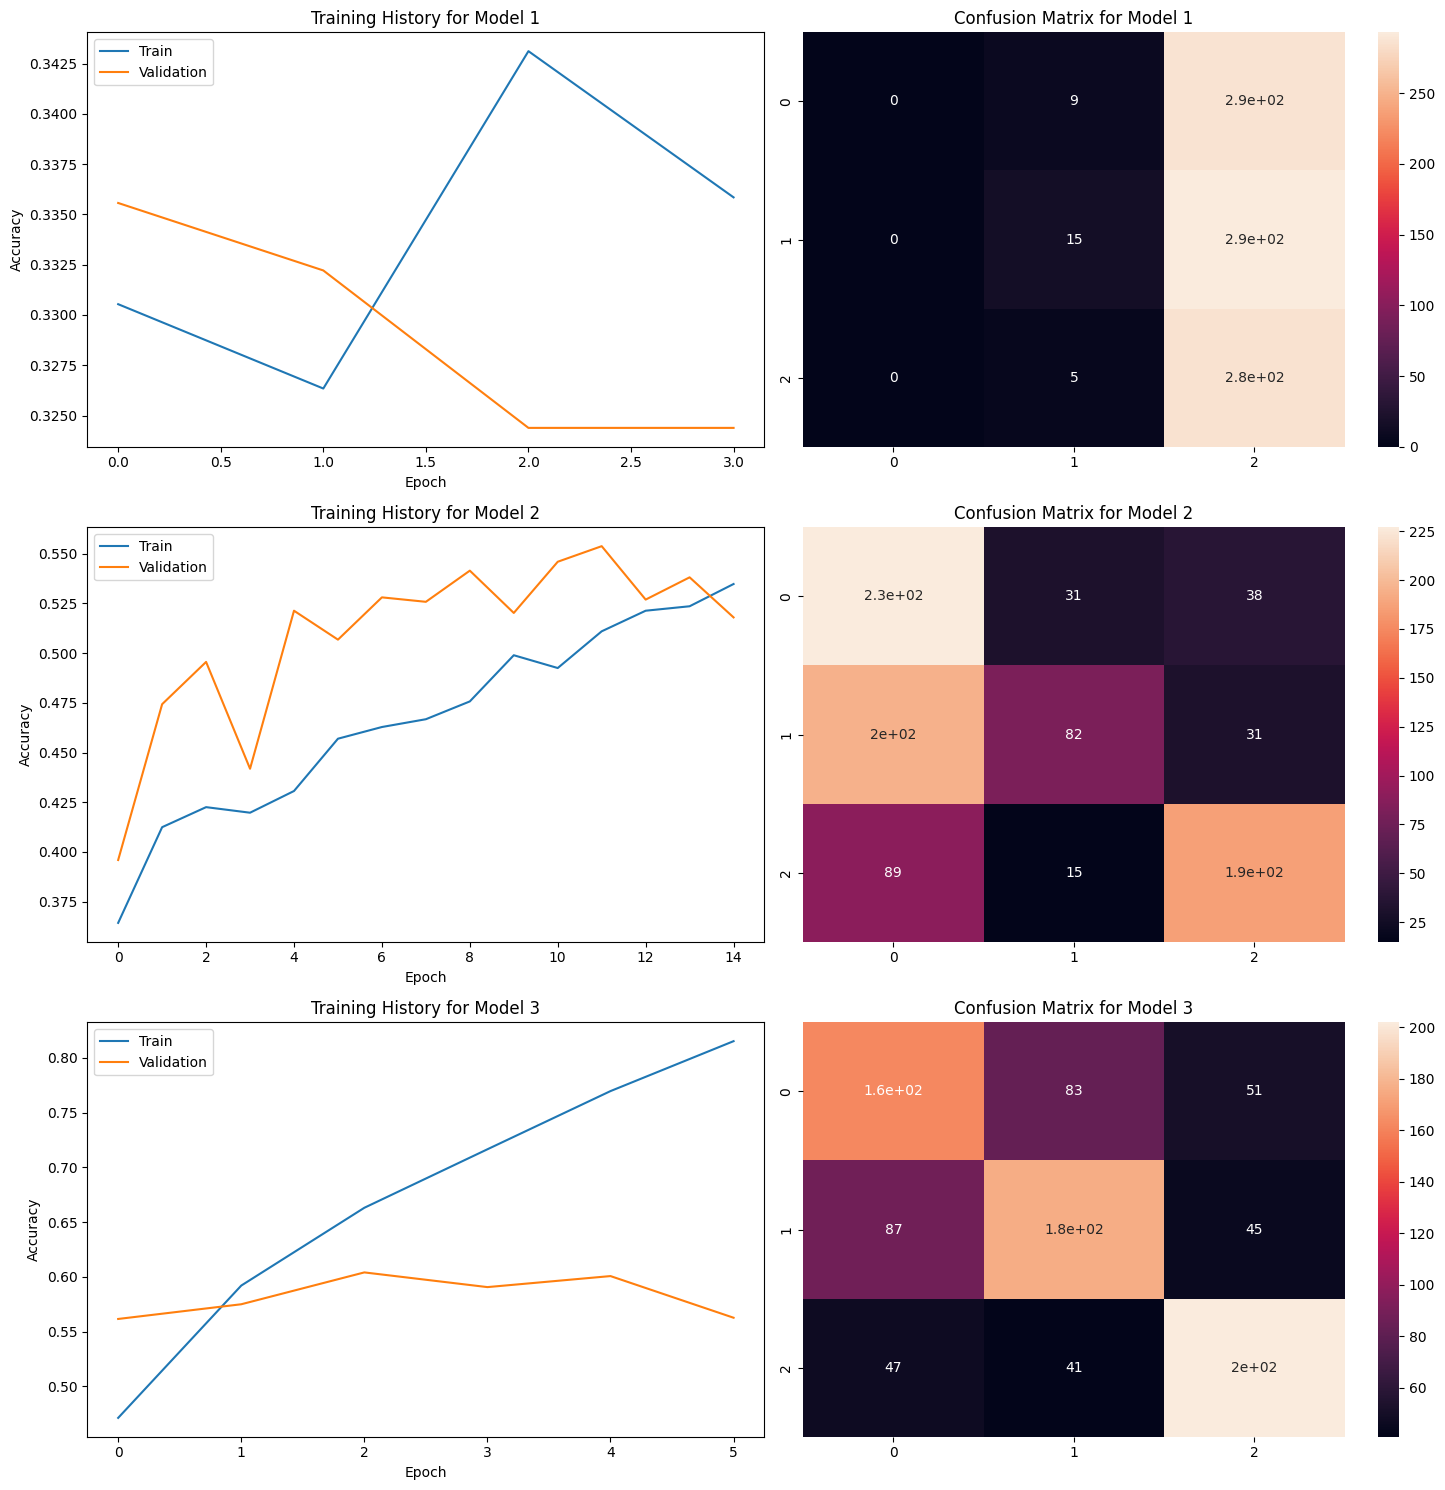

In [29]:
#plot_training_history(history_simpleCNN)
#plot_confusion_matrix(data_gen_pruebas, simpleCNN, valid_steps)

# Put the histories in a dictionary with the model names as keys
model_histories = {
    'Model 1': history_simpleCNN,
    'Model 2': history_scalingCNN,
    'Model 3': history_conventionalCNN
}

# Use the function to plot the training history and confusion matrix for each model
plot_multiple_models2(model_histories, X_test, y_test)

# Transfer Learning -- MobileNetv2 

In [32]:
#Aquí se muestra cómo usar MobileNetV2 en TensorFlow:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

### se crea el modelo base

In [33]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.utils import plot_model

# Cargar MobileNetV2 sin las capas densas (solo las capas convolucionales)
base_model = MobileNetV2(weights='imagenet', include_top=False)

# Visualizar la arquitectura del modelo
plot_model(base_model, to_file='mobilenetv2.png', show_shapes=True, show_layer_names=True)

C:\Users\escob\AppData\Local\Temp\ipykernel_19308\2477754010.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False)


You must install pydot (`pip install pydot`) for `plot_model` to work.


In [35]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

# Crear el modelo MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(data_gen_entrenamiento.class_indices), activation='softmax')(x)

mobileNetv2 = Model(inputs=base_model.input, outputs=predictions)

# Congelar todas las capas de MobileNetV2
for layer in base_model.layers:
    layer.trainable = False 

# Entrenar el modelo
# Set the learning rate
lr = 0.0001
opt = Adam(learning_rate=lr) # Instantiate the optimizer

# Compilar el modelo
mobileNetv2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Set the early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

history_mobileNetv2 = mobileNetv2.fit(X_train, y_train, epochs=300, validation_data=(X_test,y_test), callbacks=[reduce_lr, early_stop])

C:\Users\escob\AppData\Local\Temp\ipykernel_19308\3329332640.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False)


Epoch 1/300
112/112 ━━━━━━━━━━━━━━━━━━━━ 83s 698ms/step - accuracy: 0.5268 - loss: 0.9914 - val_accuracy: 0.6499 - val_loss: 0.8516 - learning_rate: 1.0000e-04
Epoch 2/300
112/112 ━━━━━━━━━━━━━━━━━━━━ 77s 692ms/step - accuracy: 0.6456 - loss: 0.8156 - val_accuracy: 0.6398 - val_loss: 0.8530 - learning_rate: 1.0000e-04
Epoch 3/300
112/112 ━━━━━━━━━━━━━━━━━━━━ 75s 670ms/step - accuracy: 0.6896 - loss: 0.7601 - val_accuracy: 0.6510 - val_loss: 0.8097 - learning_rate: 1.0000e-04
Epoch 4/300
112/112 ━━━━━━━━━━━━━━━━━━━━ 76s 677ms/step - accuracy: 0.7070 - loss: 0.7132 - val_accuracy: 0.6544 - val_loss: 0.8171 - learning_rate: 1.0000e-04
Epoch 5/300
112/112 ━━━━━━━━━━━━━━━━━━━━ 75s 674ms/step - accuracy: 0.7418 - loss: 0.6686 - val_accuracy: 0.6588 - val_loss: 0.8167 - learning_rate: 1.0000e-04
Epoch 6/300
112/112 ━━━━━━━━━━━━━━━━━━━━ 76s 679ms/step - accuracy: 0.7318 - loss: 0.6601 - val_accuracy: 0.6667 - val_loss: 0.8069 - learning_rate: 1.0000e-04
Epoch 7/300
112/112 ━━━━━━━━━━━━━━━━━━━━

### se entrenan las capas de la mobile Netv2 desde la 130 y luego la 100

In [36]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

# Crear el modelo MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(data_gen_entrenamiento.class_indices), activation='softmax')(x)

mobileNetv2_0 = Model(inputs=base_model.input, outputs=predictions)

""" # Congelar todas las capas de MobileNetV2
for layer in base_model.layers:
    layer.trainable = False """

# Entrenar el modelo
# Set the learning rate
lr = 0.0001
opt = Adam(learning_rate=lr) # Instantiate the optimizer

# Unfreeze the base MobileNet model
base_model.trainable = True 
# Fine-tune from this layer onwards
fine_tune_at = 130
# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

# Compilar el modelo
mobileNetv2_0.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Set the early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

history_mobileNetv2_0 = mobileNetv2_0.fit(X_train, y_train,
  validation_data=(X_test, y_test),
  epochs=35,  # replace with the number of epochs you want 
  callbacks=[reduce_lr, early_stop])

C:\Users\escob\AppData\Local\Temp\ipykernel_19308\567249229.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False)


Epoch 1/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 98s 821ms/step - accuracy: 0.5460 - loss: 0.9651 - val_accuracy: 0.4597 - val_loss: 1.2032 - learning_rate: 1.0000e-04
Epoch 2/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 89s 798ms/step - accuracy: 0.7725 - loss: 0.5985 - val_accuracy: 0.3635 - val_loss: 2.1589 - learning_rate: 1.0000e-04
Epoch 3/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 87s 781ms/step - accuracy: 0.8811 - loss: 0.3702 - val_accuracy: 0.3870 - val_loss: 2.3997 - learning_rate: 1.0000e-04
Epoch 4/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 87s 775ms/step - accuracy: 0.9403 - loss: 0.2270 - val_accuracy: 0.4116 - val_loss: 2.9700 - learning_rate: 1.0000e-04
Epoch 5/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 89s 798ms/step - accuracy: 0.9650 - loss: 0.1308 - val_accuracy: 0.3602 - val_loss: 4.5276 - learning_rate: 1.0000e-04
Epoch 6/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 87s 778ms/step - accuracy: 0.9862 - loss: 0.0700 - val_accuracy: 0.3490 - val_loss: 5.4910 - learning_rate: 1.0000e-04


In [37]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

# Crear el modelo MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(data_gen_entrenamiento.class_indices), activation='softmax')(x)

mobileNetv2_1 = Model(inputs=base_model.input, outputs=predictions)

""" # Congelar todas las capas de MobileNetV2
for layer in base_model.layers:
    layer.trainable = False """

# Entrenar el modelo
# Set the learning rate
lr = 0.0001
opt = Adam(learning_rate=lr) # Instantiate the optimizer

# Unfreeze the base MobileNet model
base_model.trainable = True 
# Fine-tune from this layer onwards
fine_tune_at = 100
# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

# Compilar el modelo
mobileNetv2_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Set the early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

history_mobileNetv2_1 = mobileNetv2_1.fit(X_train, y_train,
  validation_data=(X_test, y_test),
  epochs=35,  # replace with the number of epochs you want 
  callbacks=[reduce_lr, early_stop])

C:\Users\escob\AppData\Local\Temp\ipykernel_19308\1107580681.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False)


Epoch 1/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.5398 - loss: 0.9705 - val_accuracy: 0.5503 - val_loss: 0.9553 - learning_rate: 1.0000e-04
Epoch 2/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 110s 983ms/step - accuracy: 0.7751 - loss: 0.5763 - val_accuracy: 0.4966 - val_loss: 1.1523 - learning_rate: 1.0000e-04
Epoch 3/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.9195 - loss: 0.2669 - val_accuracy: 0.4564 - val_loss: 2.0500 - learning_rate: 1.0000e-04
Epoch 4/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.9700 - loss: 0.1214 - val_accuracy: 0.3613 - val_loss: 3.5456 - learning_rate: 1.0000e-04
Epoch 5/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.9734 - loss: 0.0902 - val_accuracy: 0.3803 - val_loss: 3.7235 - learning_rate: 1.0000e-04
Epoch 6/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.9877 - loss: 0.0473 - val_accuracy: 0.4754 - val_loss: 2.3929 - learning_rate: 1.0000e-04


# Se entrena la efficientNet desde la 100

In [40]:
from keras.applications import EfficientNetB0
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear el modelo EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Añadir Dropout para evitar el sobreajuste
predictions = Dense(len(data_gen_entrenamiento.class_indices), activation='softmax')(x)

efficientNet_model = Model(inputs=base_model.input, outputs=predictions)

# Ajustar las capas congeladas y el optimizador
lr = 0.0001
opt = Adam(learning_rate=lr)  # Instanciar el optimizador

# Descongelar el modelo base de EfficientNetB0
base_model.trainable = True
fine_tune_at = 100  # Ajustar el punto de fine-tuning

# Congelar todas las capas antes de fine_tune_at
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compilar el modelo
efficientNet_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Configurar EarlyStopping y ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Entrenar el modelo
history_efficientNet = efficientNet_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=35,  # replace with the number of epochs you want 
    callbacks=[reduce_lr, early_stop])


Epoch 1/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.4905 - loss: 1.0107 - val_accuracy: 0.6555 - val_loss: 0.8116 - learning_rate: 1.0000e-04
Epoch 2/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.7140 - loss: 0.6873 - val_accuracy: 0.7629 - val_loss: 0.6054 - learning_rate: 1.0000e-04
Epoch 3/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.8283 - loss: 0.4567 - val_accuracy: 0.8199 - val_loss: 0.4808 - learning_rate: 1.0000e-04
Epoch 4/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.8970 - loss: 0.2828 - val_accuracy: 0.8378 - val_loss: 0.4742 - learning_rate: 1.0000e-04
Epoch 5/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.9328 - loss: 0.1772 - val_accuracy: 0.8602 - val_loss: 0.3865 - learning_rate: 1.0000e-04
Epoch 6/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.9666 - loss: 0.1080 - val_accuracy: 0.8591 - val_loss: 0.3805 - learning_rate: 1.0000e-04
Epoch 7/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - acc

In [41]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
from keras.utils import to_categorical

def compare_model_metrics(models, dataGenerator):
    metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'ROC AUC']
    
    # Get the true labels
    y_true = dataGenerator.classes
    y_true = to_categorical(y_true, num_classes=len(dataGenerator.class_indices))  # convert to one-hot encoding
    
    results = []
    
    for model in models:
        # Predict the values from the test dataset
        Y_pred = model.predict(dataGenerator)
        
        # Calculate metrics
        accuracy = accuracy_score(y_true, np.round(Y_pred))
        sensitivity = recall_score(y_true, np.round(Y_pred), average='macro')
        specificity = recall_score(y_true, 1-np.round(Y_pred), average='macro')  # specificity is recall of the negative class
        roc_auc = roc_auc_score(y_true, Y_pred, average='macro', multi_class='ovo')
        
        results.append([accuracy, sensitivity, specificity, roc_auc])
    
    print("Model Comparison Metrics:")
    print("{:<15} {:<15} {:<15} {:<15} {:<15}".format("Model", *metrics))
    
    for i, model in enumerate(models):
        print("{:<15} {:<15.4f} {:<15.4f} {:<15.4f} {:<15.4f}".format(f"Model {i+1}", *results[i]))


def compare_model_metrics_2(models, x_test, y_test):
    metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'ROC AUC']
    
    # Convert y_test to one-hot encoding if it's not already
    if len(y_test.shape) == 1:
        y_test = to_categorical(y_test)
    
    results = []
    
    for model in models:
        # Predict the values from the test dataset
        Y_pred = model.predict(x_test)
        
        # Calculate metrics
        accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(Y_pred, axis=1))
        sensitivity = recall_score(np.argmax(y_test, axis=1), np.argmax(Y_pred, axis=1), average='macro')
        specificity = recall_score(np.argmax(y_test, axis=1), 1-np.argmax(Y_pred, axis=1), average='macro')  # specificity is recall of the negative class
        roc_auc = roc_auc_score(y_test, Y_pred, average='macro', multi_class='ovo')
        
        results.append([accuracy, sensitivity, specificity, roc_auc])
    
    print("Model Comparison Metrics:")
    print("{:<15} {:<15} {:<15} {:<15} {:<15}".format("Model", *metrics))
    
    for i, model in enumerate(models):
        print("{:<15} {:<15.4f} {:<15.4f} {:<15.4f} {:<15.4f}".format(f"Model {i+1}", *results[i]))


In [42]:
# Comparar los modelos
compare_model_metrics_2([simpleCNN,scalingCNN,conventionalCNN, mobileNetv2,mobileNetv2_0,mobileNetv2_1, efficientNet_model], X_test, y_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step


C:\Users\escob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step


C:\Users\escob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


28/28 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step


C:\Users\escob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 539ms/step


C:\Users\escob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 540ms/step


C:\Users\escob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 533ms/step


C:\Users\escob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 715ms/step
Model Comparison Metrics:
Model           Accuracy        Sensitivity     Specificity     ROC AUC        
Model 1         0.3356          0.3438          0.0076          0.5084         
Model 2         0.5537          0.5582          0.1845          0.7152         
Model 3         0.6040          0.6051          0.1407          0.7530         
Model 4         0.6834          0.6833          0.0963          0.8357         
Model 5         0.4597          0.4530          0.1689          0.7171         
Model 6         0.5503          0.5520          0.1456          0.7375         
Model 7         0.9072          0.9064          0.0066          0.9829         


C:\Users\escob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 485ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 489ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 506ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 635ms/step


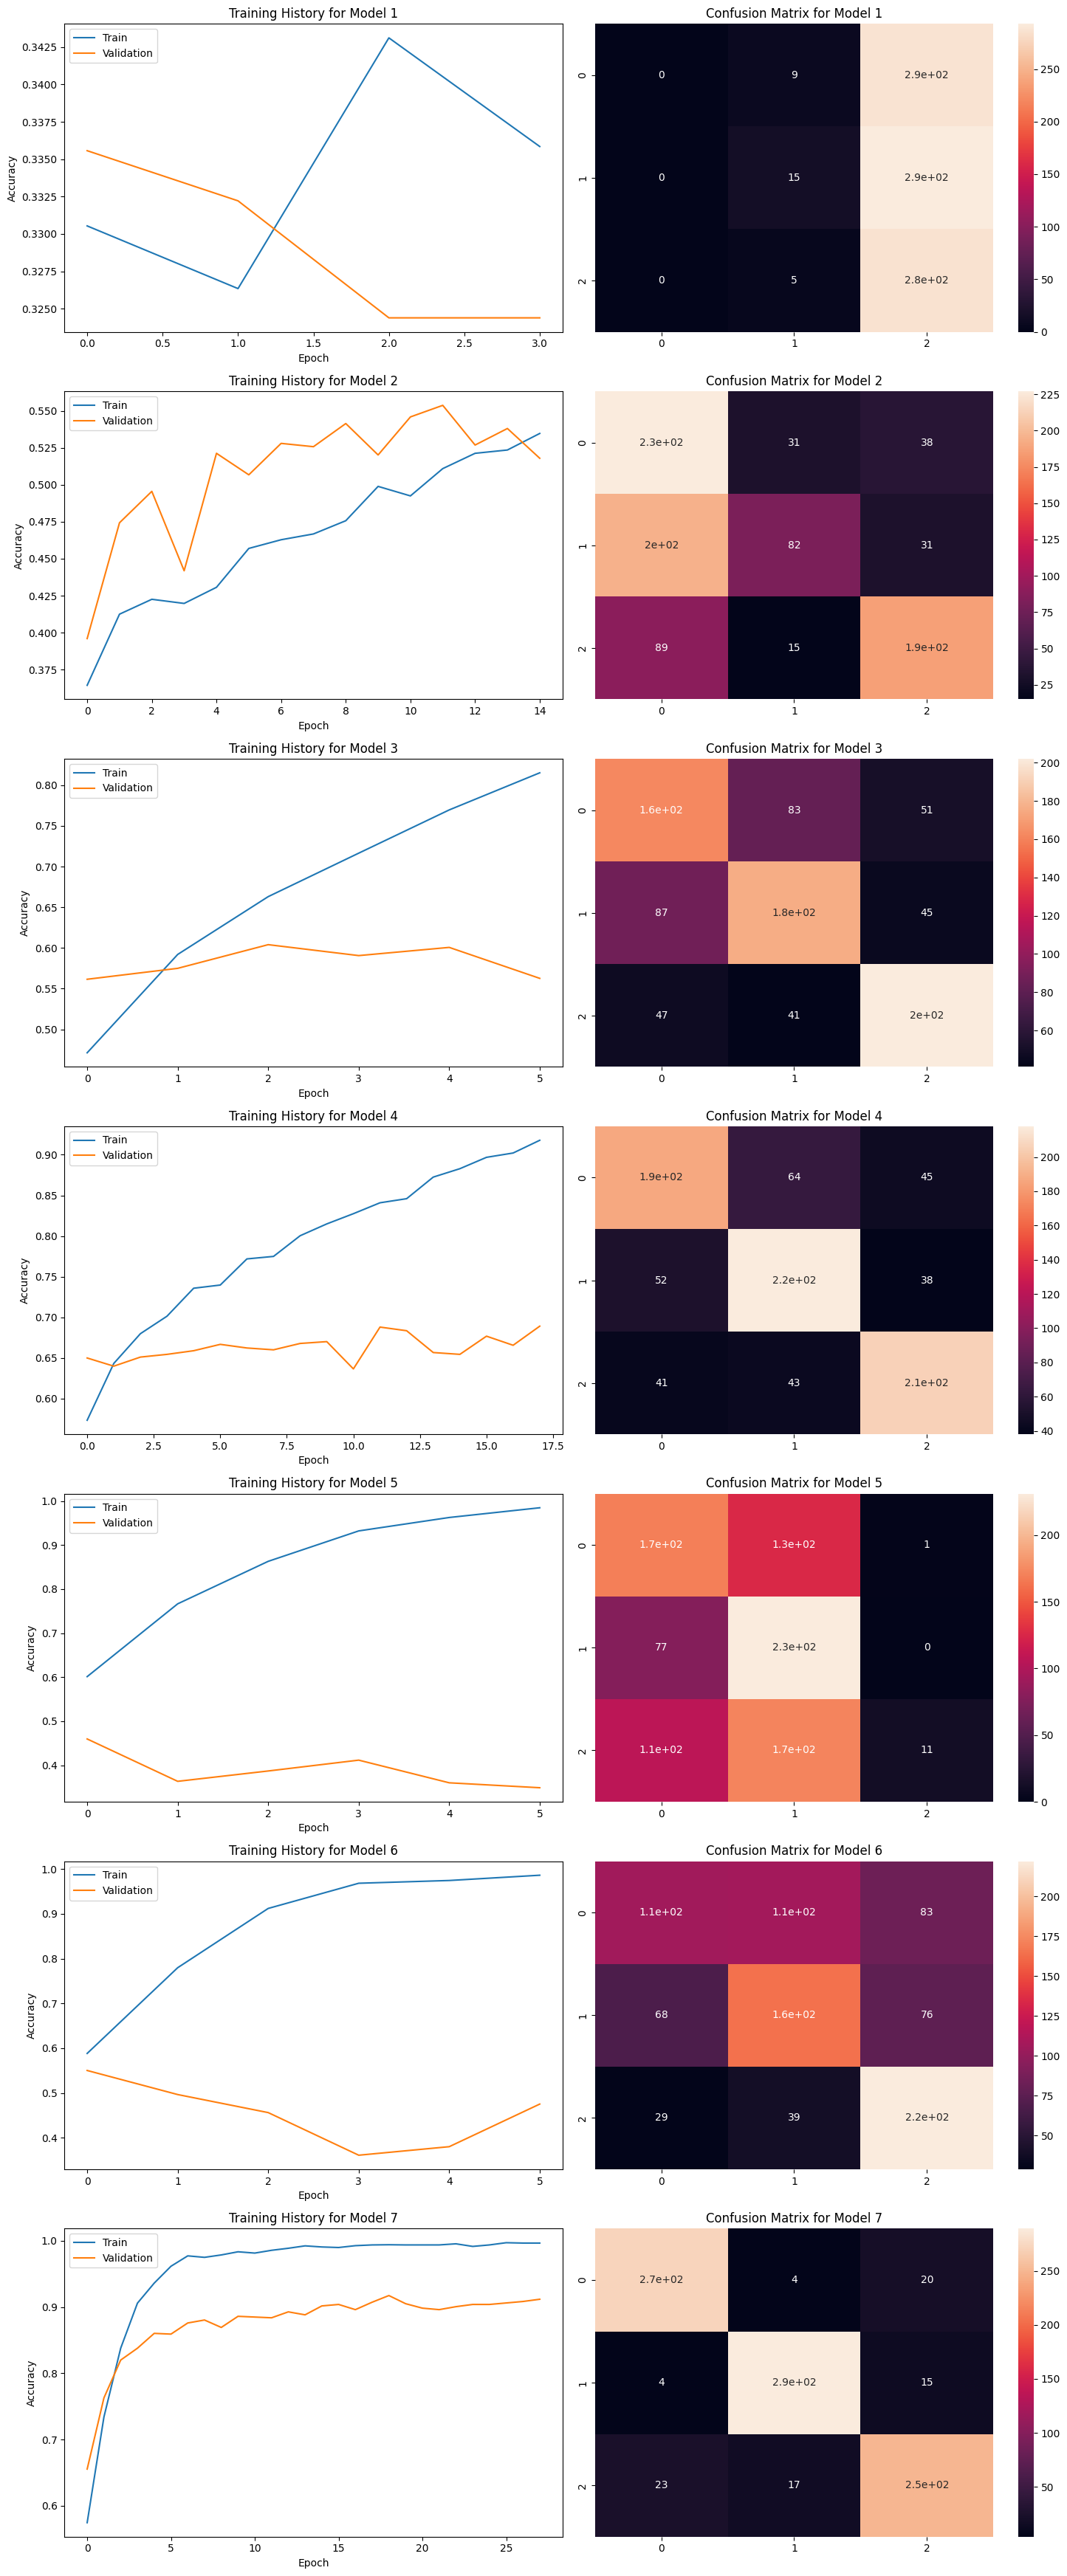

In [43]:

# Put the histories in a dictionary with the model names as keys
model_histories = {
    'Model 1': history_simpleCNN,
    'Model 2': history_scalingCNN,
    'Model 3': history_conventionalCNN,
    'Model 4': history_mobileNetv2,
    'Model 5': history_mobileNetv2_0,
    'Model 6': history_mobileNetv2_1,
    'Model 7': history_efficientNet
}

# Use the function to plot the training history and confusion matrix for each model
plot_multiple_models2(model_histories, X_test, y_test)

## Vemos como compara en el entrenamiento

112/112 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 57s 505ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 56s 499ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 55s 491ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 72s 638ms/step


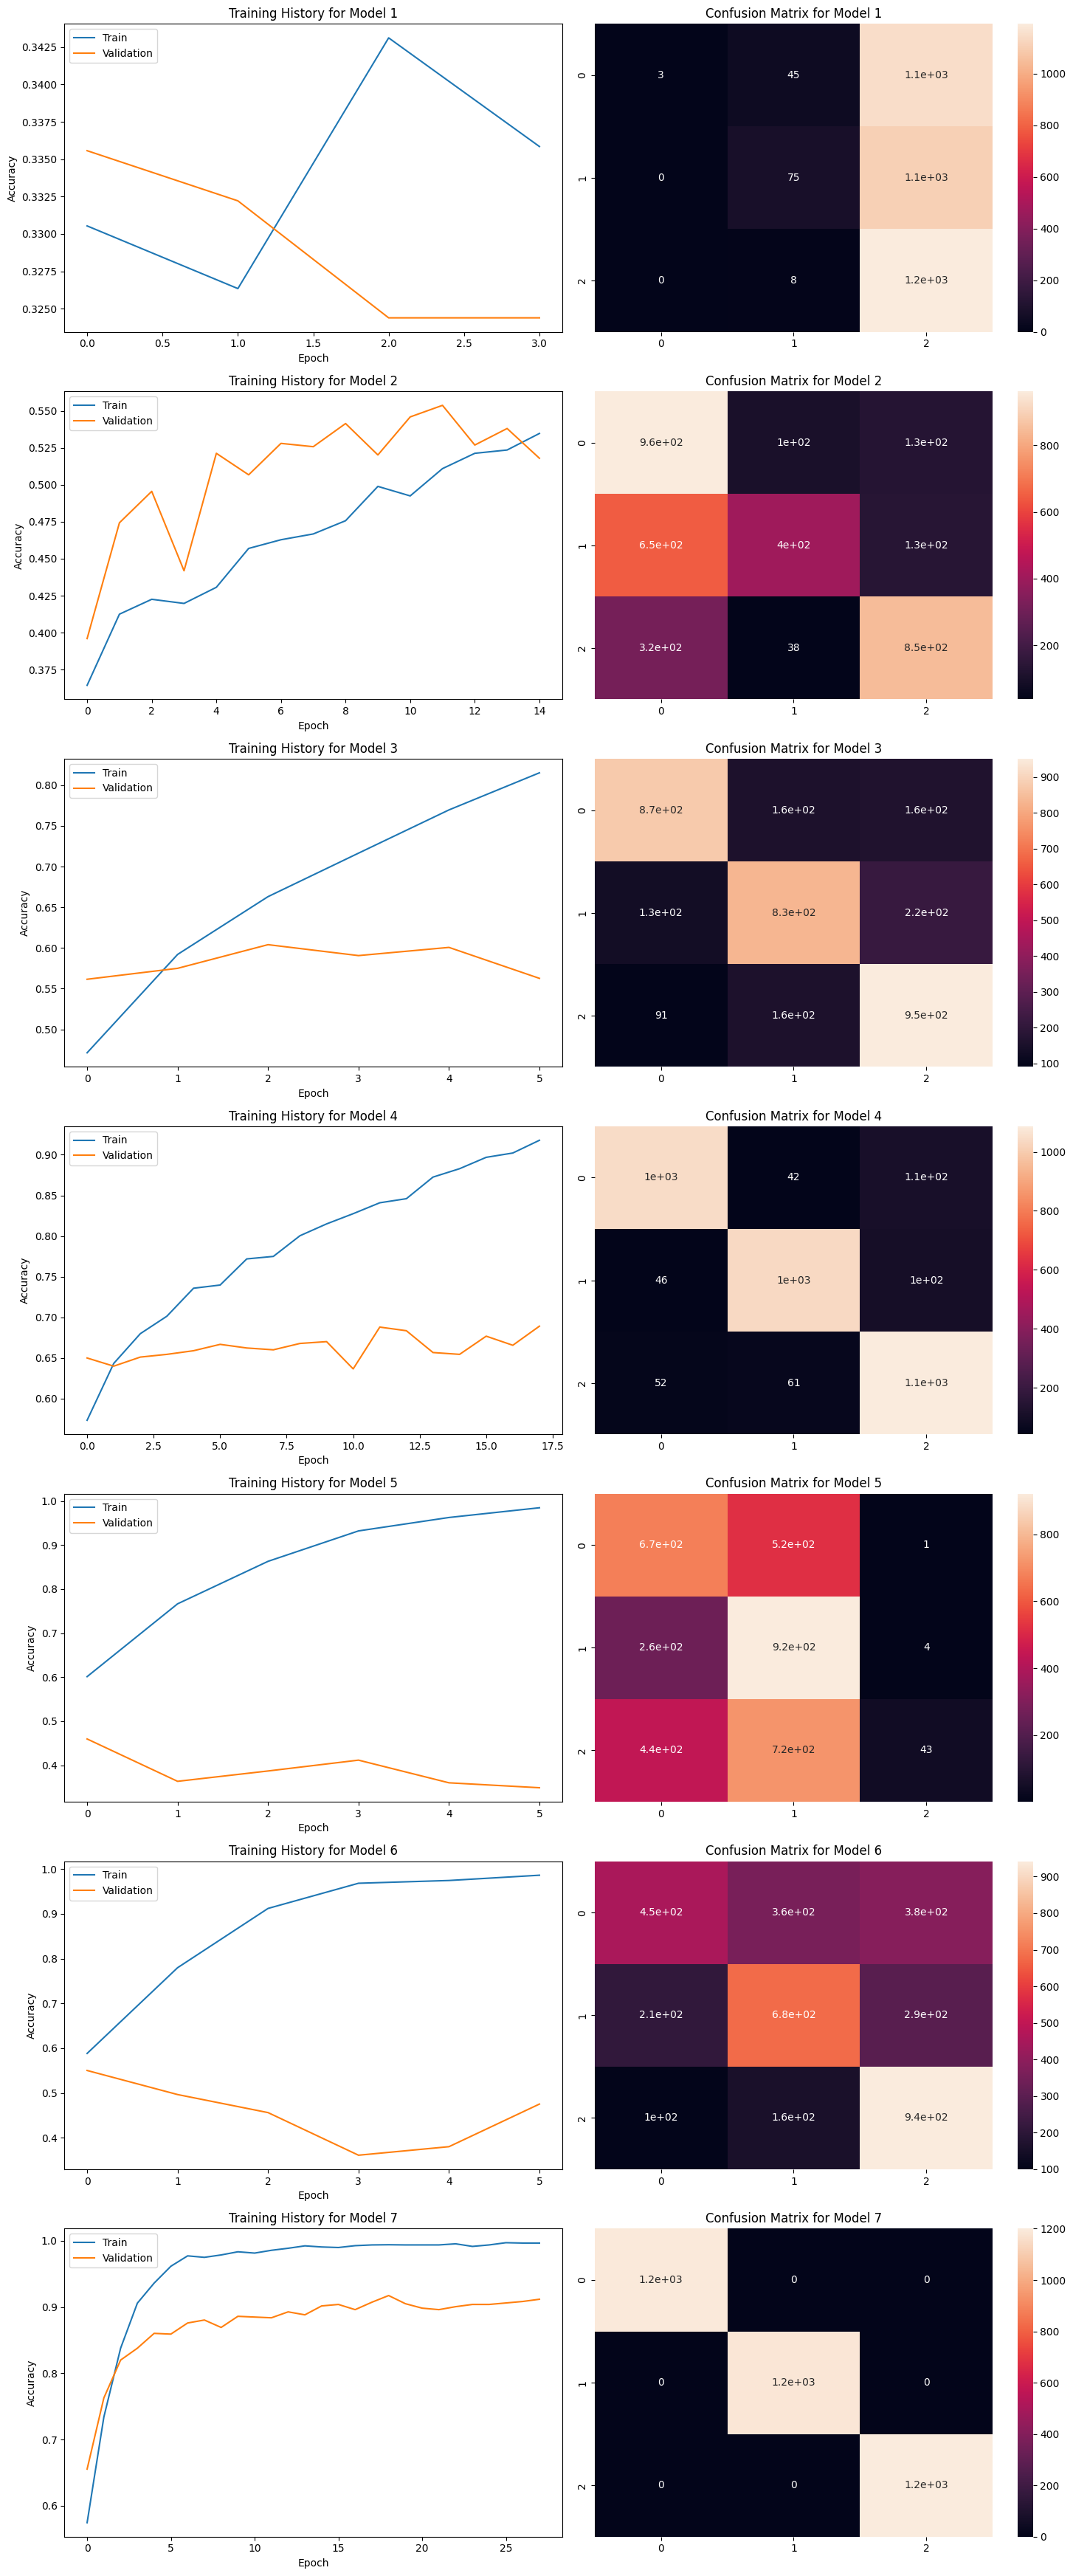

In [44]:
plot_multiple_models2(model_histories, X_train, y_train)

## Kfolds Crossvalidation

Finalmente nuestro set de entrenamiento y prueba está listo!

In [45]:
from sklearn.model_selection import KFold

# Configuring KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Store the metrics
history_dicts = []
aucs = []

for train_index, val_index in kfold.split(X):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Limit the number of training steps per epoch
    total_steps = len(X_train_fold) // 8  # Batch size of 16

    history = efficientNet_model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=16, validation_data=(X_val_fold, y_val_fold),
                        steps_per_epoch=total_steps)  # Limit the number of training steps per epoch

    history_dicts.append(history.history)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 3)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize

# Predicciones de validación
y_val_pred = efficientNet_model.predict(X_test)

# Convertir las etiquetas y las predicciones al formato de clase única
y_val_single = np.argmax(y_test, axis=1)
y_val_pred_single = np.argmax(y_val_pred, axis=1)

# Imprimir el reporte de clasificación
print(classification_report(y_val_single, y_val_pred_single))

# Convertir las etiquetas al formato binario
y_val_binary = label_binarize(y_val_single, classes=np.unique(y_val_single))

# Calcular la curva ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_val_single))):
    fpr[i], tpr[i], _ = roc_curve(y_val_binary[:, i], y_val_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el promedio de los AUCs
mean_auc = np.mean(list(roc_auc.values()))

# Graficar la curva ROC para cada clase
plt.figure()
colors = ['blue', 'red', 'green']  # Puedes ajustar los colores según la cantidad de clases
for i, color in zip(range(len(np.unique(y_val_single))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()